In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import glob



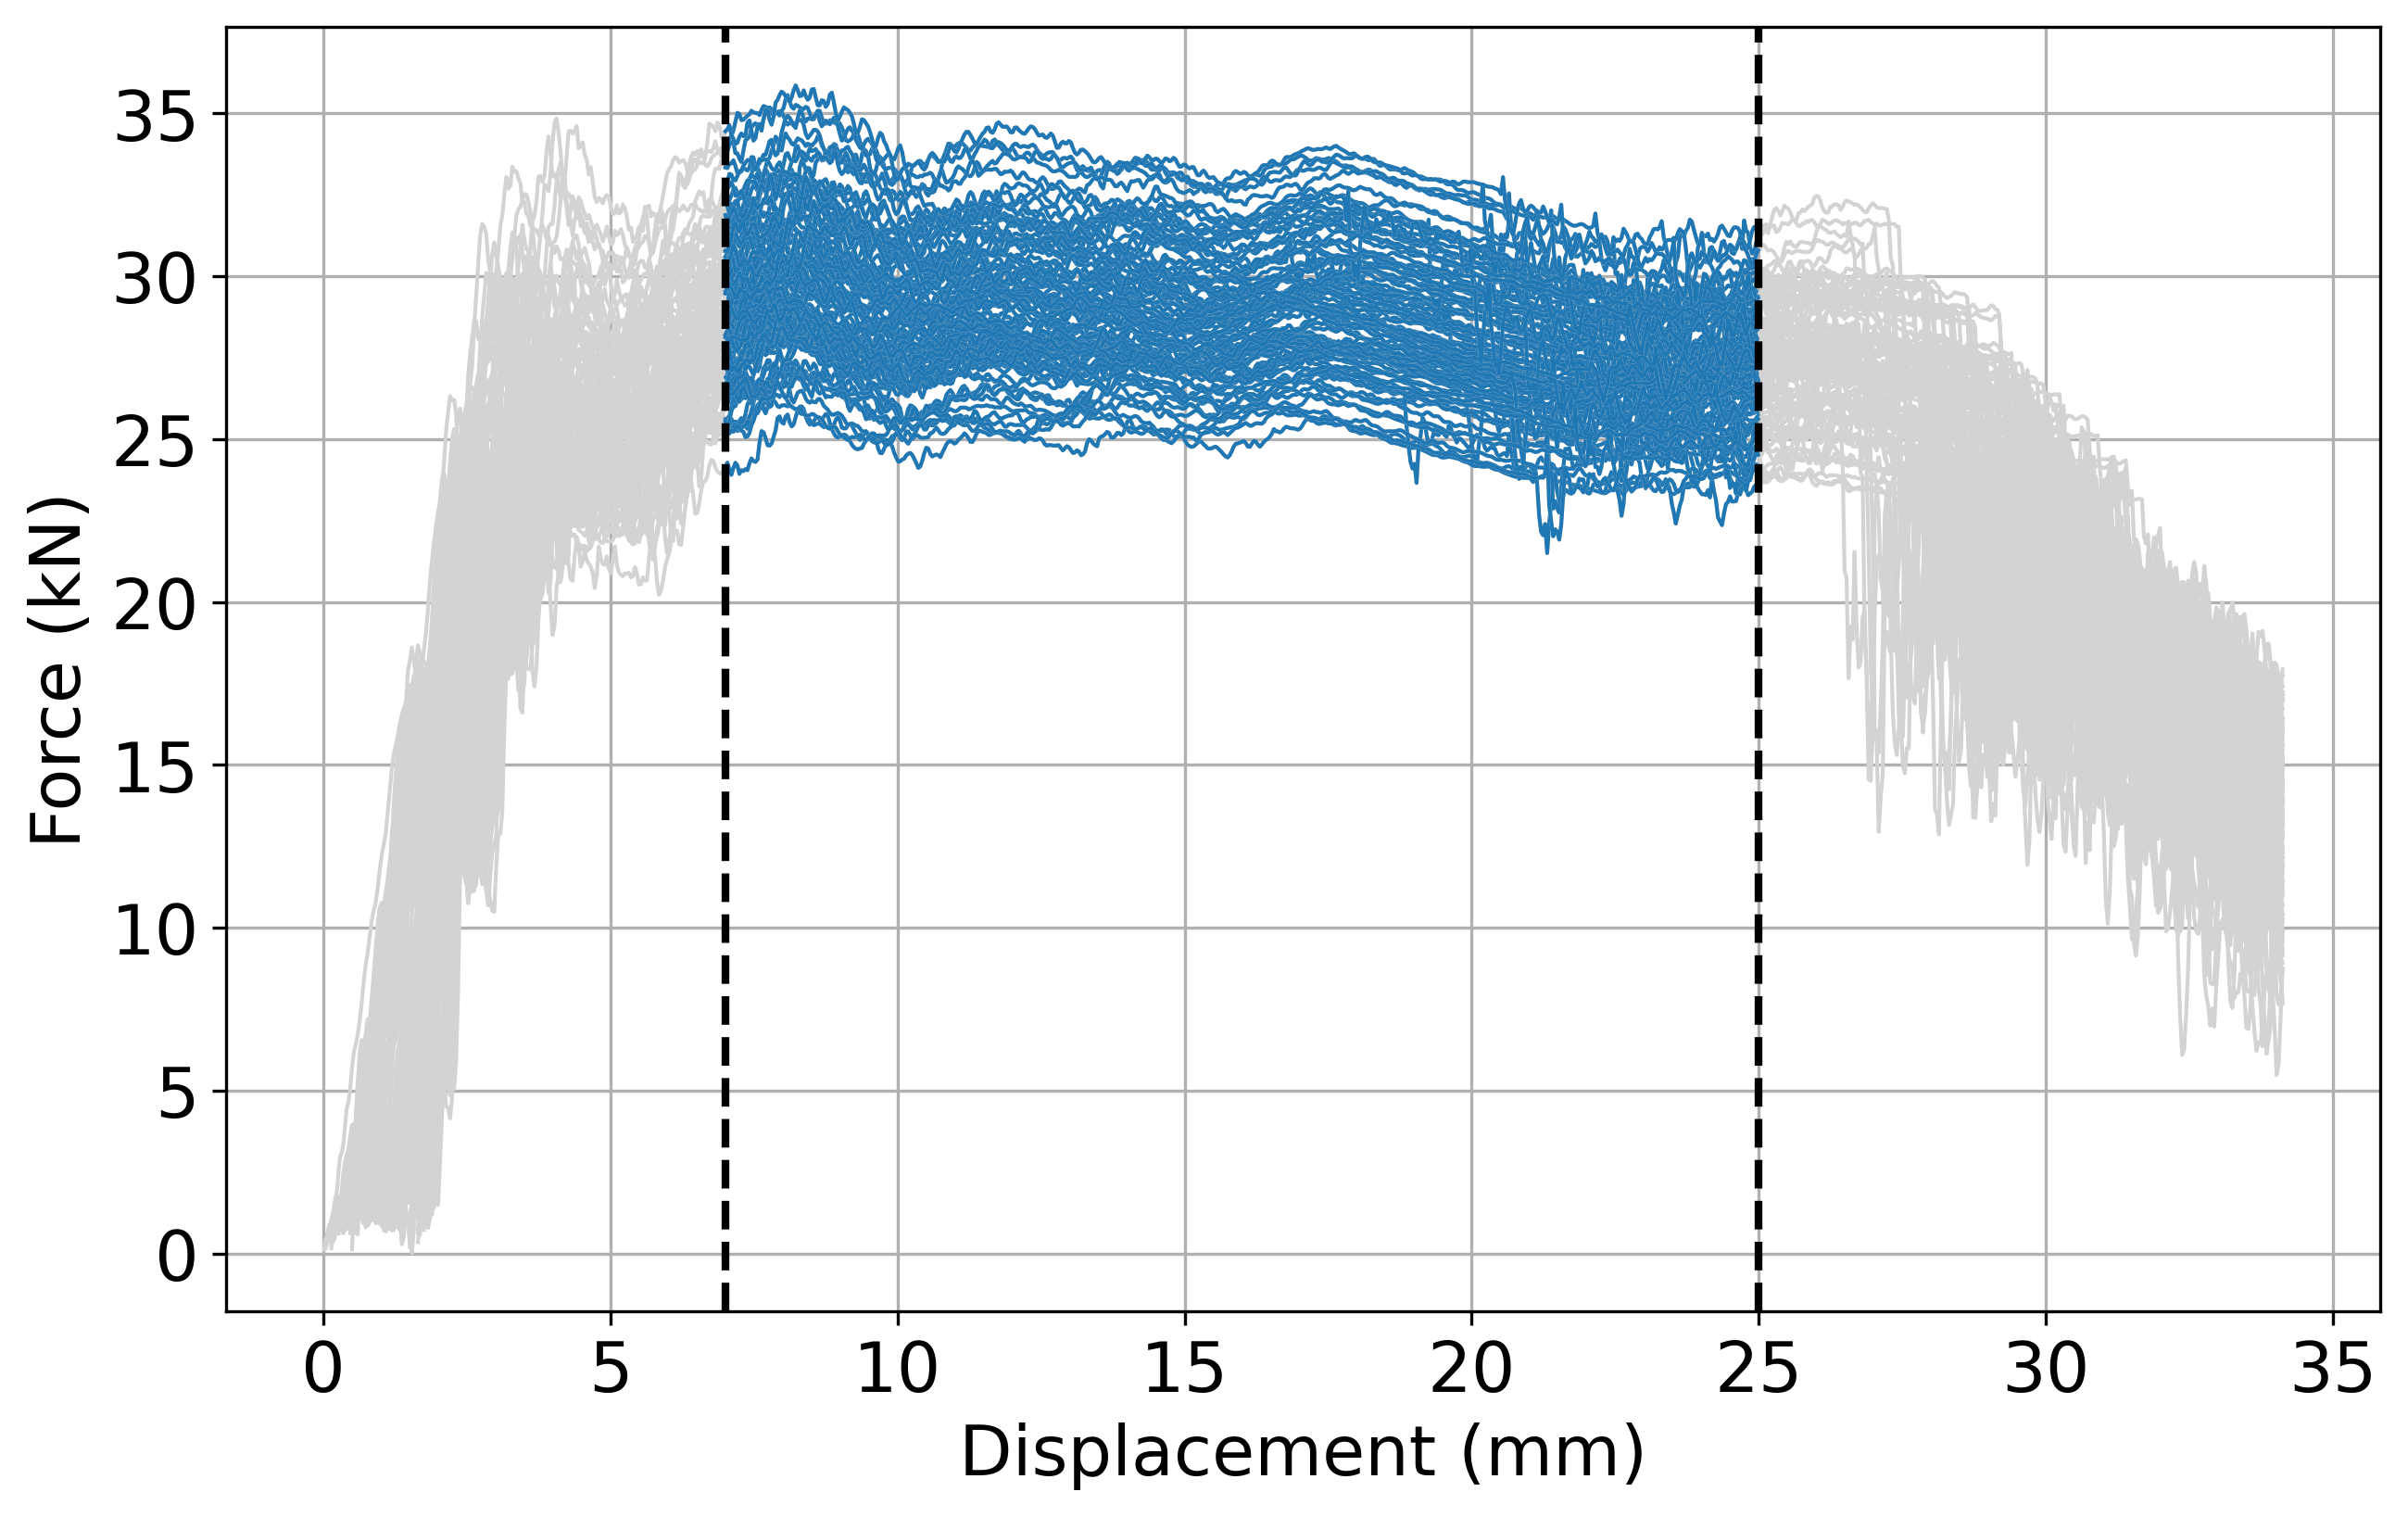

In [73]:
type = 'bending'

plt.figure(figsize=(10, 6), dpi=300)
for i in range(1, 101):
    df = pd.read_csv('Simulation_'+type+'/CONSTANT_THICKNESS_100/'+type+'_X_data.csv/'+type+'_'+str(i)+'_data.csv')
    plt.plot(df['DMM'], df['FKN'], linewidth=1, color='lightgray')
    start_index = np.searchsorted(df['DMM'], 7)  # Find index for x=0
    end_index = np.searchsorted(df['DMM'], 25)    # Find index for x=7
    plt.plot(df['DMM'][start_index:end_index], df['FKN'][start_index:end_index], color='tab:blue', linewidth=1, label='Highlighted Area')

plt.axvline(x=7, color='black', linewidth=2, linestyle='--')
plt.axvline(x=25, color='black', linewidth=2, linestyle='--')
#plt.axvspan(7, 25, color='tab:orange', alpha=0.1)
plt.xlabel('Displacement (mm)', fontsize=18)
plt.ylabel('Force (kN)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()

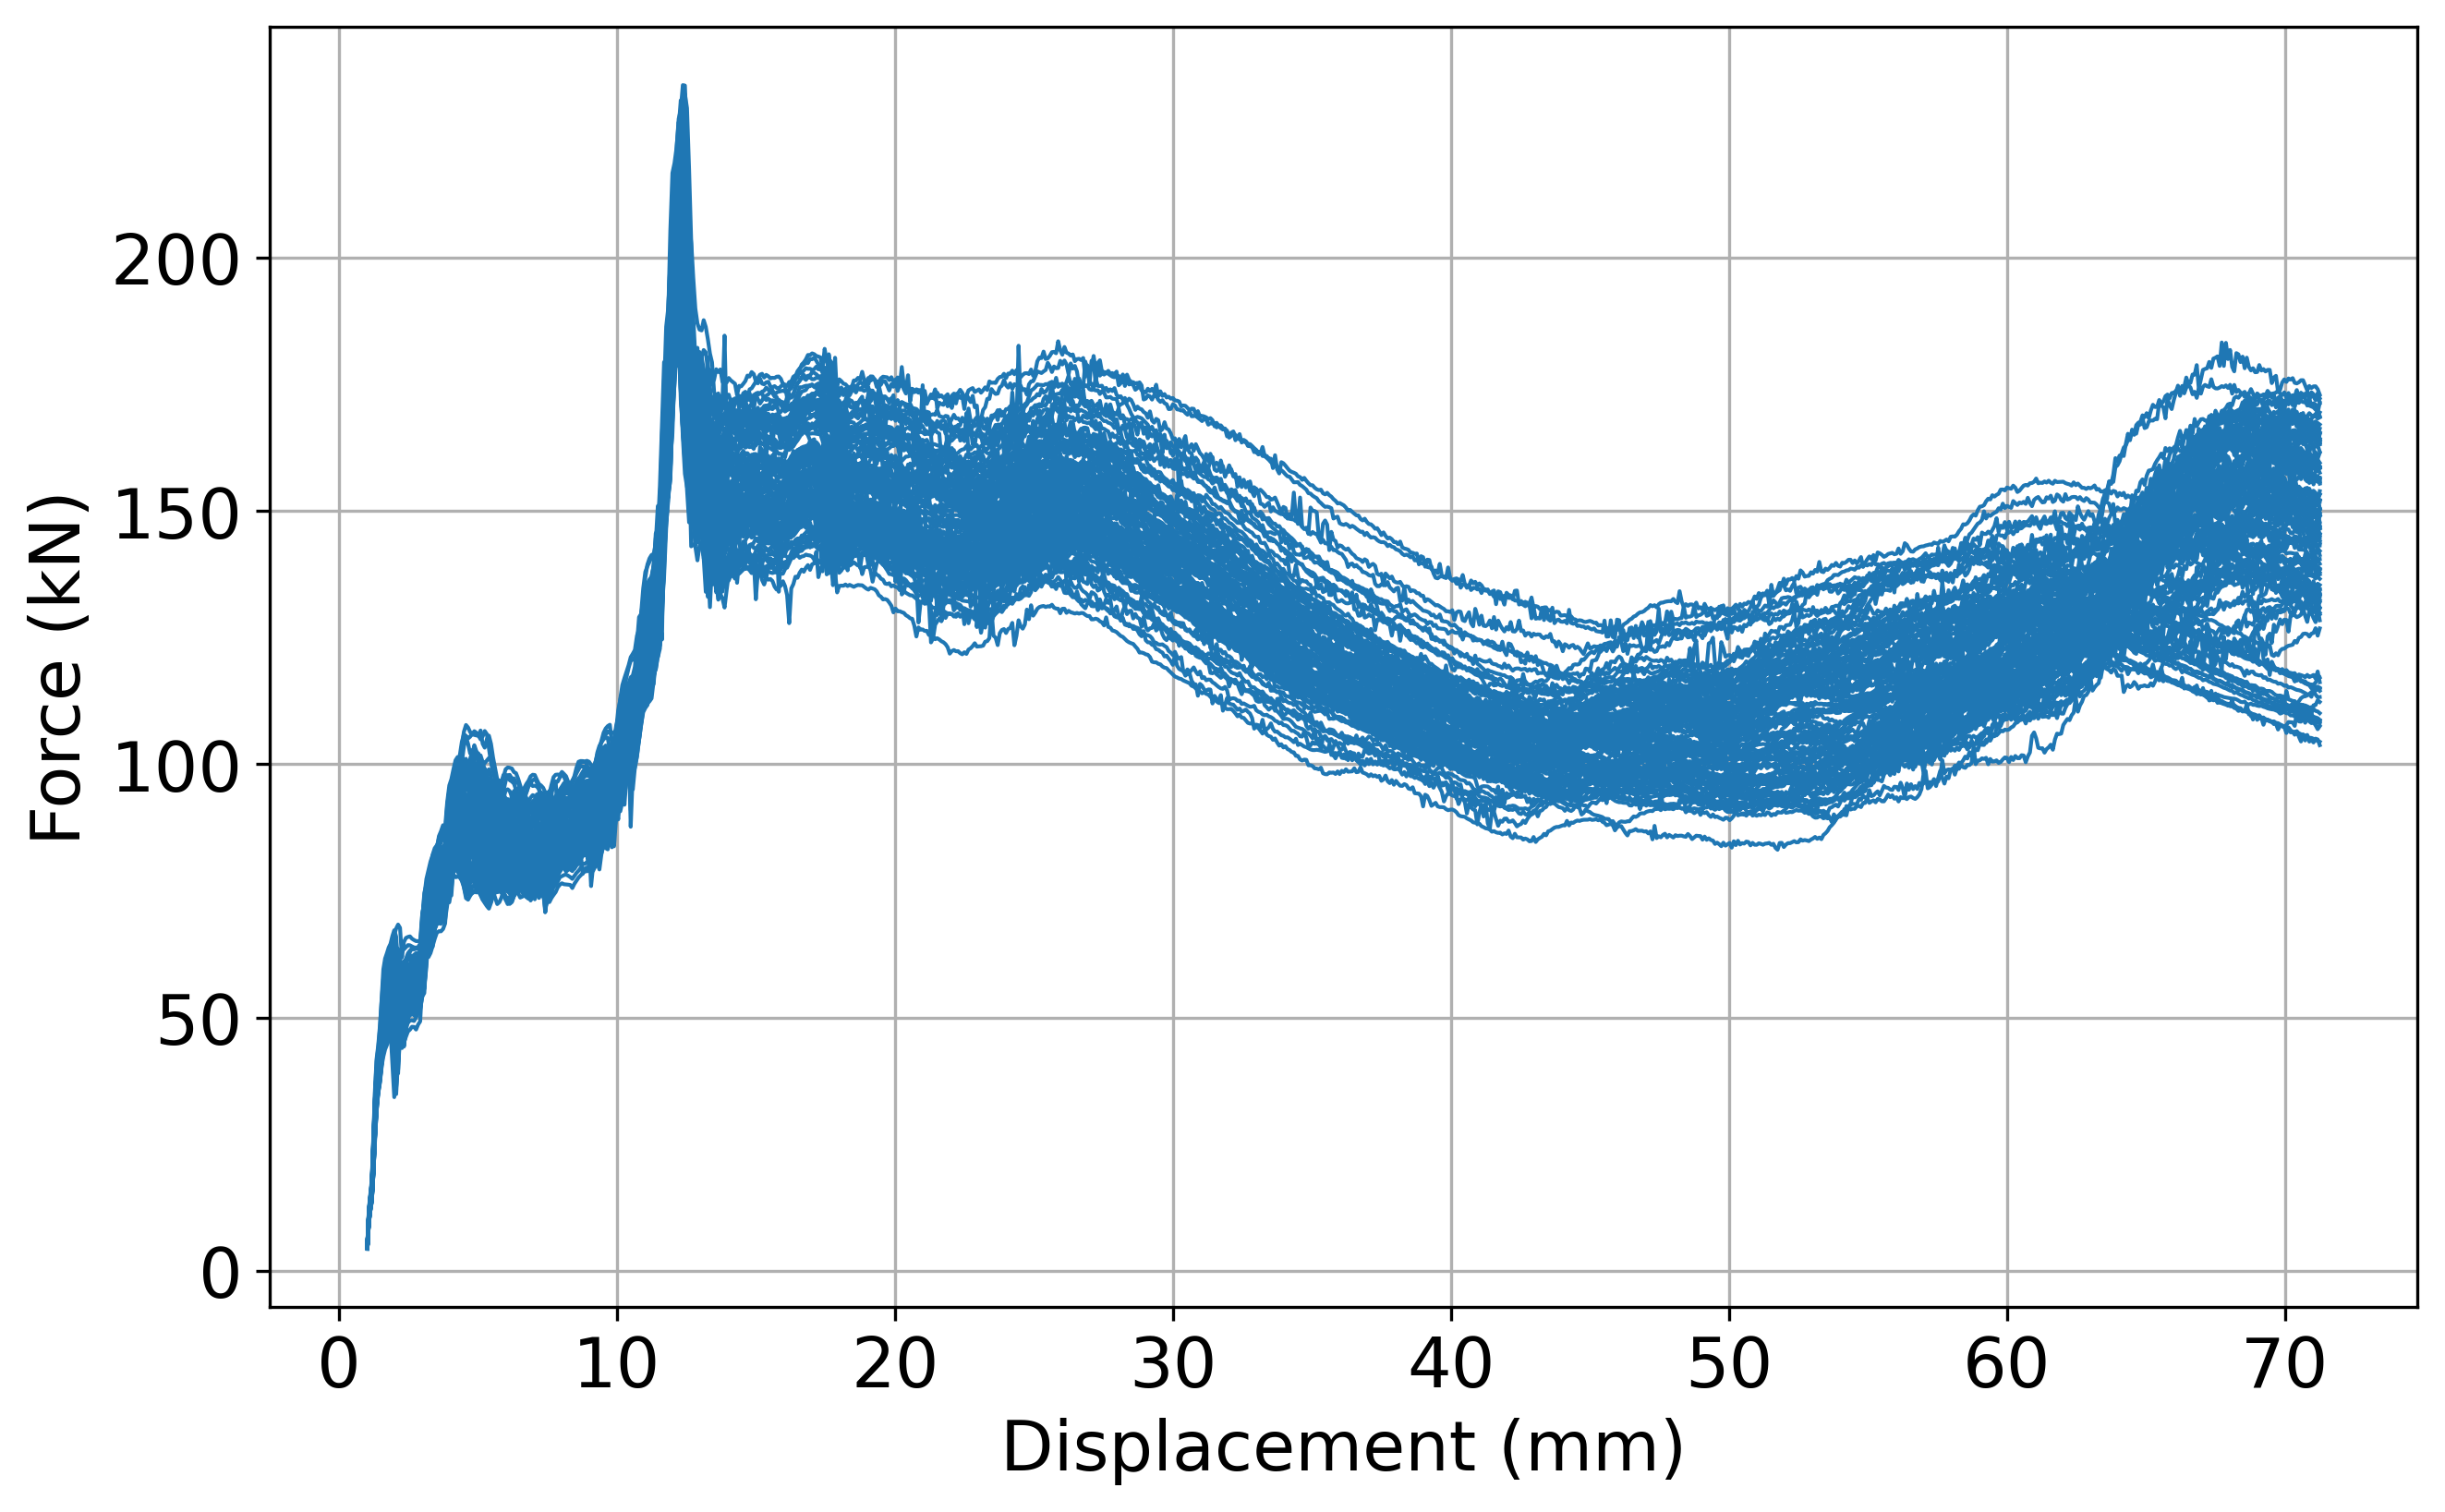

In [76]:
type = 'crushing'

plt.figure(figsize=(10, 6), dpi=300)
for i in range(1, 101):
    df = pd.read_csv('Simulation_'+type+'/CONSTANT_THICKNESS_100/'+type+'_X_data.csv/'+type+'_'+str(i)+'_data.csv')
    plt.plot(df['DMM'], df['FKN'], linewidth=1, color='tab:blue')
plt.xlabel('Displacement (mm)', fontsize=18)
plt.ylabel('Force (kN)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()

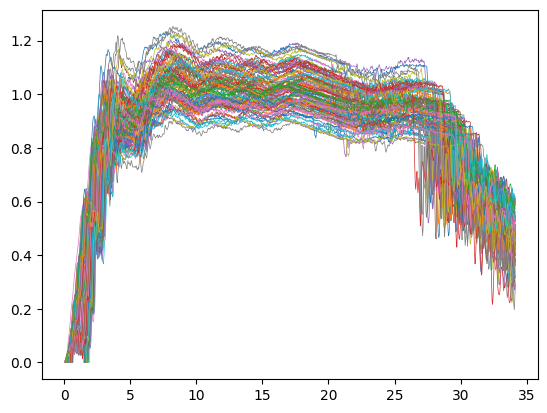

In [20]:
# Calculate energy
energy_df = pd.DataFrame()

for test_number in range(1, 101):
    df = pd.read_csv('Simulation_BENDING/CONSTANT_THICKNESS_100/BENDING_X_data.csv/BENDING_'+str(test_number)+'_data.csv')
    energy_array = [0]
    for i in range (1, len(df)):
        delta_displacement = (df['DMM'].iloc[i] - df['DMM'].iloc[i-1])
        mean_force = (df['FKN'].iloc[i-1] + df['FKN'].iloc[i])/2
        energy_array.append(mean_force * delta_displacement)
    energy_sum_df = pd.DataFrame({'Energy': [sum(energy_array)]})
    energy_df = pd.concat([energy_df, energy_sum_df], ignore_index=True)
    plt.plot(df['DMM'], energy_array, linewidth=0.5)

    

In [ ]:
print(energy_df)

In [ ]:
# Assuming the files are in a folder called 'Simulation_BENDING/Results'
folder_path = 'Simulation_BENDING/CONSTANT_THICKNESS_100/BENDING_X_data.csv'
file_pattern = os.path.join(folder_path, 'BENDING_*_data.csv')
file_list = glob.glob(file_pattern)

# Initialize lists to hold all the data
all_force_data = []
all_displacement_data = []

# Read each file and append the force data to the list
for file in file_list:
    df = pd.read_csv(file)
    displacement = df['DMM']  # Assuming 'DMM' is the displacement column
    all_displacement_data.append(displacement)
    force = df['FKN']         # Assuming 'FKN' is the force column
    all_force_data.append(force)

# Convert the list of series into a DataFrame
force_data_df = pd.concat(all_force_data, axis=1)
displacement_data_df = pd.concat(all_displacement_data, axis=1)

# Calculate max, min, and mean values across columns for each displacement
max_force = force_data_df.max(axis=1)
displacement_max_force = displacement_data_df.loc[force_data_df.idxmax(axis=1)]
min_force = force_data_df.min(axis=1)
displacement_min_force = force_data_df.idxmin(axis=1)
mean_force = force_data_df.mean(axis=1)
displacement_mean_force = force_data_df.mean(axis=1)
median_force = force_data_df.median(axis=1)
displacement_median_force = force_data_df.median(axis=1)


# Now plot these as functions of displacement
plt.plot(displacement_max_force, max_force, label='Max Force', linewidth=0.5, color='blue')
plt.plot(displacement_min_force, min_force, label='Min Force', linewidth=0.5, color='blue')
plt.plot(displacement_mean_force, mean_force, label='Mean Force', linewidth=2, color='red')
plt.plot(displacement_median_force, median_force, label='Median Force', linewidth=2, color='green')
#plt.fill_between(displacement, min_force, max_force, color='blue', alpha=0.2)

# Add labels and legend
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')
plt.title('Force-Displacement')
plt.legend()

plt.show()


In [ ]:
max_force_df = pd.DataFrame()
parameters = pd.read_csv('Simulation_BENDING/parameters_v1.csv')
for i in range(100):
    new_data = pd.read_csv('Simulation_BENDING/Results/BENDING_X_data.csv/BENDING_'+str(i+1)+'_data.csv')
    max_force = new_data['FKN'].max()
    new_data_df = pd.DataFrame()
    new_data_df['max_force'] = [max_force]
    for parameter in parameters.columns:
        new_data_df[parameter] = parameters[parameter][i]
    max_force_df = pd.concat([max_force_df, new_data_df])

max_force_df.reset_index(drop=True, inplace=True)
max_force_df = max_force_df.drop(columns=['sample'])

max_force_df.head()

In [ ]:
dataplot = sb.heatmap(max_force_df.corr(), cmap="Reds", annot=True)  
plt.show()

In [ ]:
correlation_matrix = max_force_df.corr()
fkn_correlation = correlation_matrix[['max_force']].drop('max_force')

plt.figure(figsize=(3, 8))  # Adjust the size to fit your particular needs
sb.heatmap(fkn_correlation, annot=True, cmap='Reds', cbar=True)
plt.show()

In [ ]:
mean_force_df = pd.DataFrame()

for i in range(100):
    new_data = pd.read_csv('Simulation_BENDING/Results/BENDING_X_data.csv/BENDING_'+str(i+1)+'_data.csv')
    mean_force = new_data['FKN'].mean()
    new_data_df = pd.DataFrame()
    new_data_df['mean_force'] = [mean_force]
    for parameter in parameters.columns:
        new_data_df[parameter] = parameters[parameter][i]
    mean_force_df = pd.concat([mean_force_df, new_data_df])

mean_force_df.reset_index(drop=True, inplace=True)
mean_force_df = mean_force_df.drop(columns=['sample'])

mean_force_df.head()

In [ ]:
dataplot = sb.heatmap(mean_force_df.corr(), cmap="Reds", annot=True)  
plt.show()

In [ ]:
correlation_matrix = mean_force_df.corr()
fkn_correlation = correlation_matrix[['mean_force']].drop('mean_force')

plt.figure(figsize=(3, 8))
sb.heatmap(fkn_correlation, annot=True, cmap='Reds', cbar=True)
plt.show()

In [ ]:
sb.pairplot(max_force_df, kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [ ]:
main_df = mean_force_df.join(max_force_df['max_force'])
main_df = main_df.join(energy_df['Energy'])
header = parameters.columns.tolist()[1:]
main_df = main_df[['Energy', 'mean_force', 'max_force'] + header]
main_df.head()

In [ ]:
dataplot = sb.heatmap(main_df.corr(), cmap="Reds", annot=True)  
plt.show()

In [ ]:
sb.pairplot(main_df, kind='reg', plot_kws={'line_kws':{'color':'red'}})